# Classification and regression trees

In [41]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Decision trees

Features:
- Easy to understand and interpret
- Suitable for problems with more than two classes

What it is:
- A classification tree is an information structure consisting of nodes connected by arcs – branches.
- Each node defines a test – a check of the value of a certain characteristic of the example, and each branch coming out of this node corresponds to one of the possible values ​​of the checked characteristic.
- The leaves of the classification tree represent the values ​​of the target attribute.

Prediction algorithm:
- The classification of the new example starts from the top node of the tree (the root) and is carried out by checking
for the value of the characteristic described in this node;
- then the example is “launched” down the branch that corresponds to the specific value of the checked attribute in the given example.
- The described process is repeated at the current node until the example reaches one of the leaves of the tree.

In `scklearn` the classification tree is implemented in the class [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). There is also a regression option - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

Main parameters of the algorithm:
* `criteria` - criterion - metric for finding the optimal split in the nodes
* `max_depth` - maximum depth of the tree
* `min_samples_split` - the minimum number of examples in a given node, required for its split

`max_depth` and `min_samples_split` are regularization parameters, as they control the size of the tree and, accordingly, the complexity of the model.

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

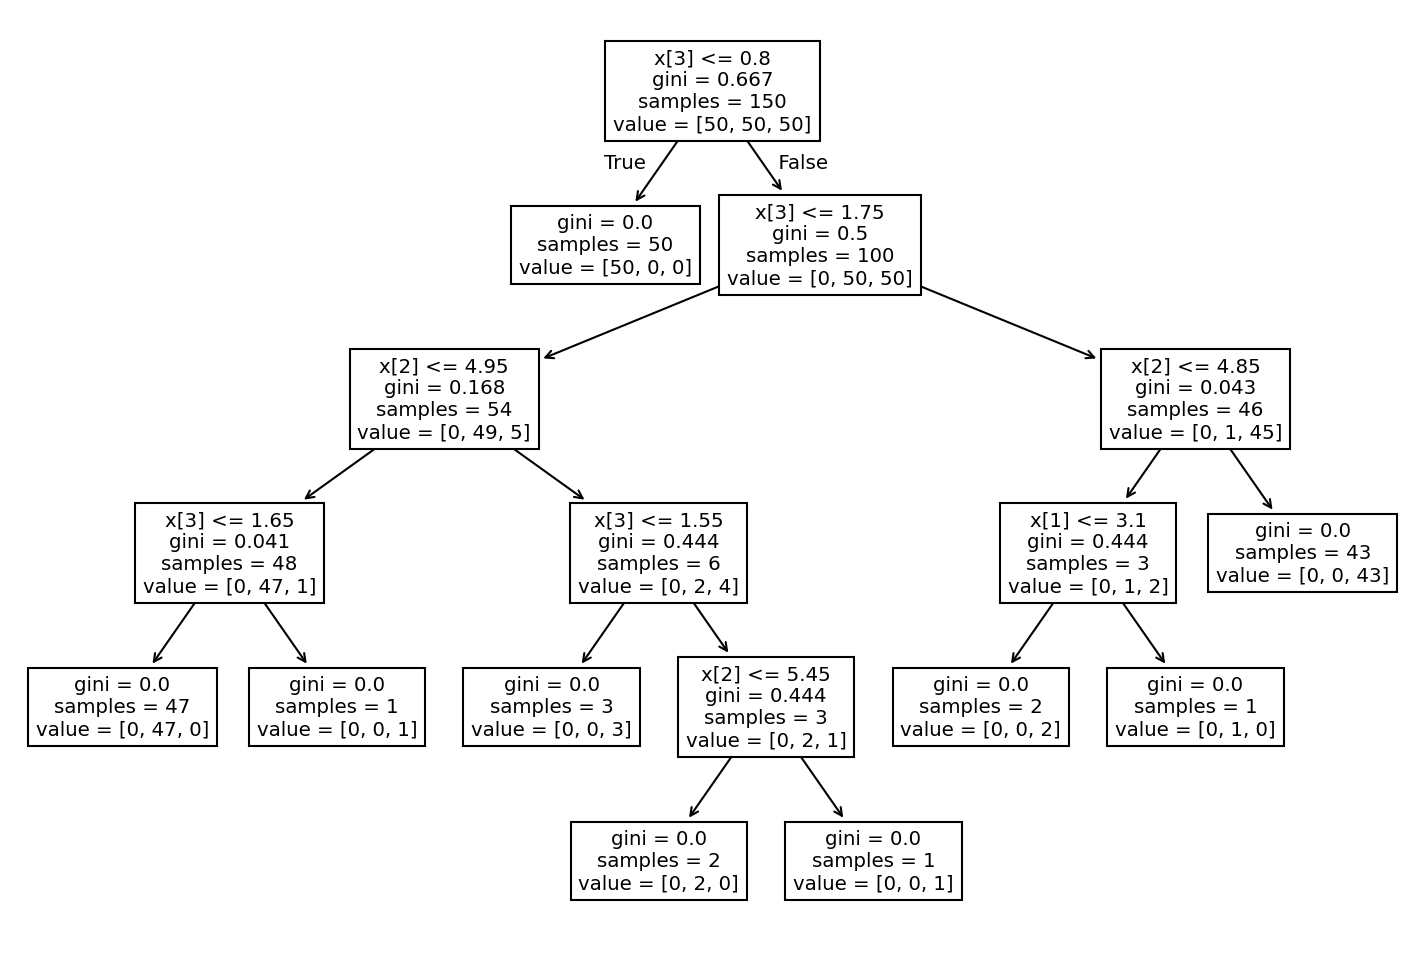

In [42]:
# Пример с iris 
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
plt.figure(figsize=(12,8),dpi=150)
tree.plot_tree(clf)

In [43]:
def plot_tree_scores(depths):
    train_scores = []
    test_scores = []
    
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_scores, color='blue', label='train score')
    plt.plot(depths, test_scores, color='green', label='test score')
    plt.legend()

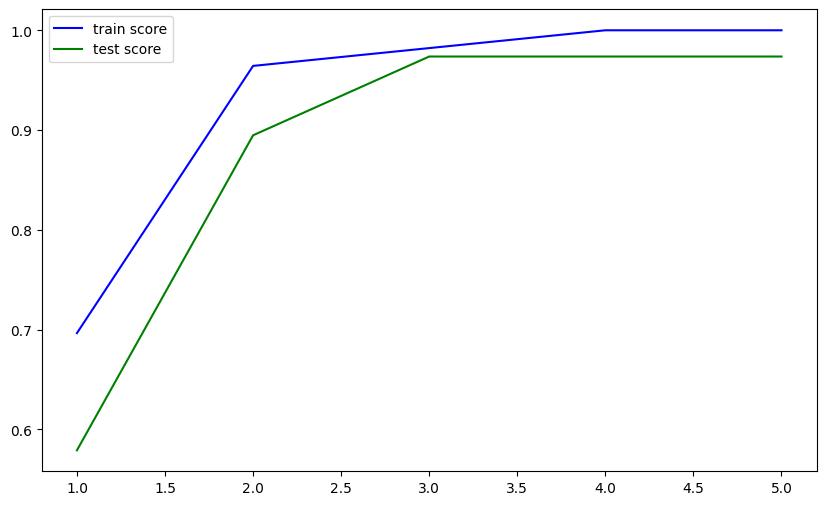

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
plot_tree_scores(range(1, 6))

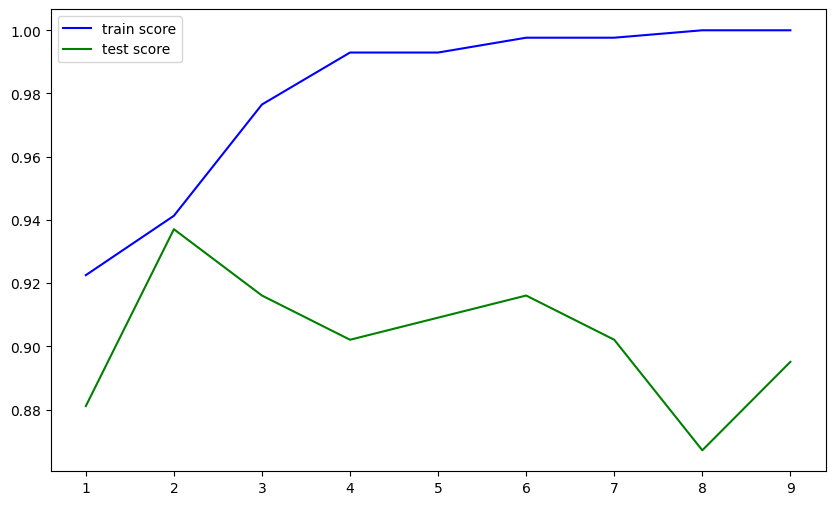

In [45]:
# За breast cancer 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
plot_tree_scores(range(1, 10))

Now we will take a closer look at what happens using some synthetic classification data.

In [46]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100,
                           n_features=2,
                           n_redundant=0, 
                           n_clusters_per_class=2, 
                           random_state=123)

In [47]:
print(x[:4])
print(y[:4])

[[-0.01032243 -0.80566819]
 [-1.10293659  2.21661117]
 [-1.90795358 -0.20839902]
 [ 0.53115524  2.2762704 ]]
[1 0 0 1]


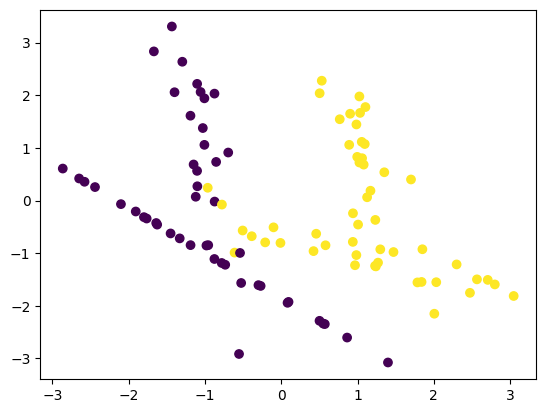

In [48]:
plt.scatter(x[:,0], x[:,1], c=y);

In [49]:
# Plotting decision regions adapted from 
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [50]:
clf = DecisionTreeClassifier().fit(x,y)
print(clf.score(x, y))

#Cross validation
scores = cross_val_score(clf, x, y, cv=5)
print(scores)
print(scores.mean())

1.0
[0.95 0.95 0.9  0.85 1.  ]
0.93


### How is the algorithm learned?

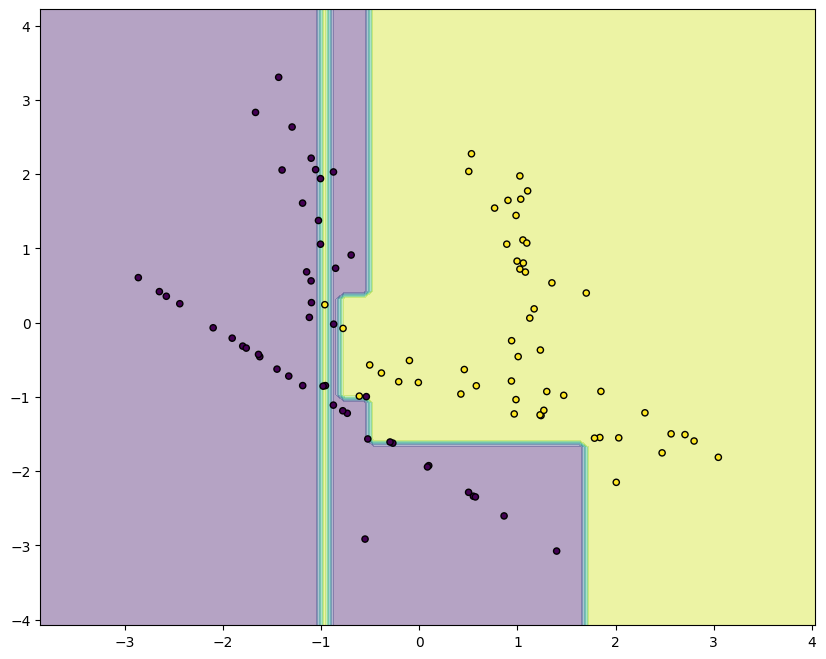

In [51]:
clf = DecisionTreeClassifier().fit(x, y)
plot_boundary(clf, x, y)

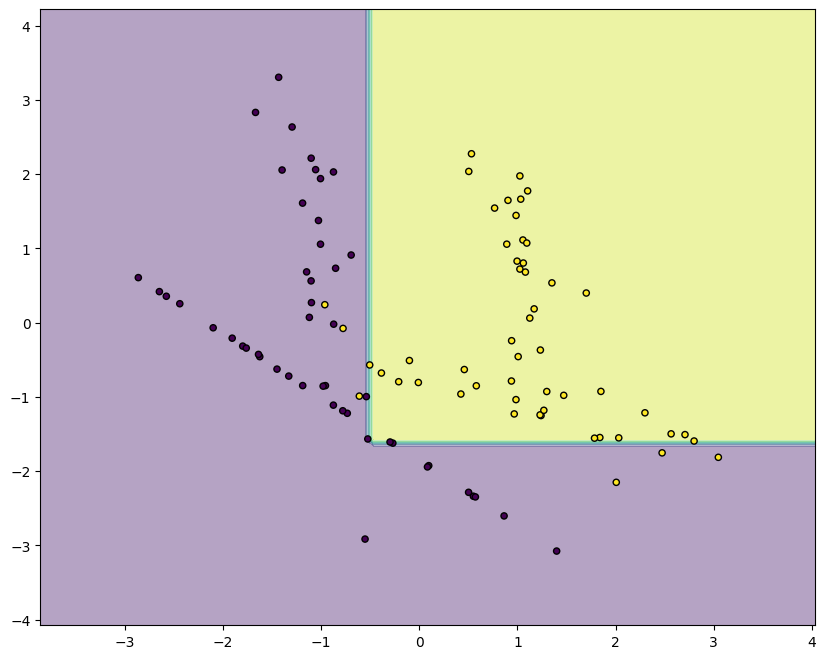

In [56]:
clf = DecisionTreeClassifier(max_depth=2).fit(x, y)
plot_boundary(clf, x, y)

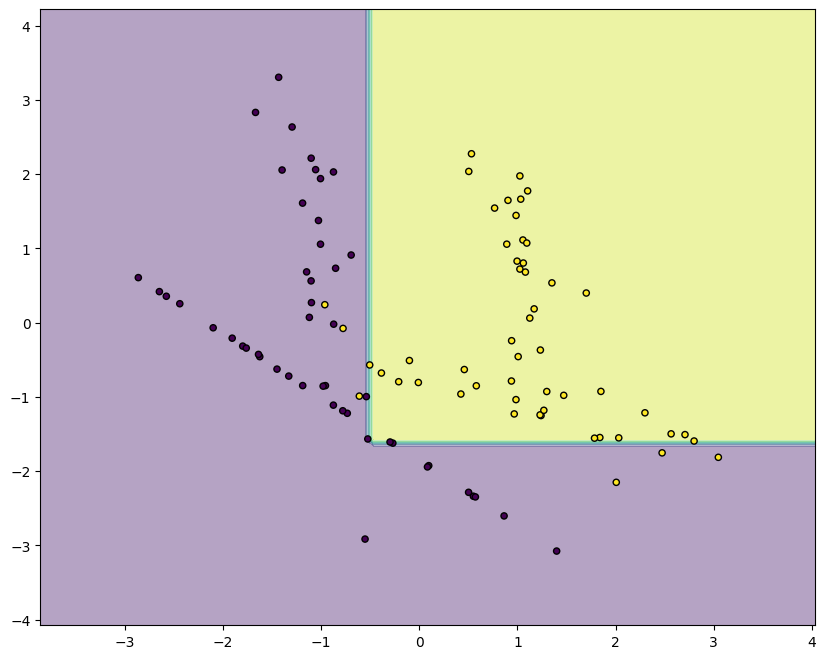

In [58]:
clf = DecisionTreeClassifier(min_samples_split=50).fit(x, y)
plot_boundary(clf, x, y)

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.516\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(0.2, 0.5, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -1.601\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]')]

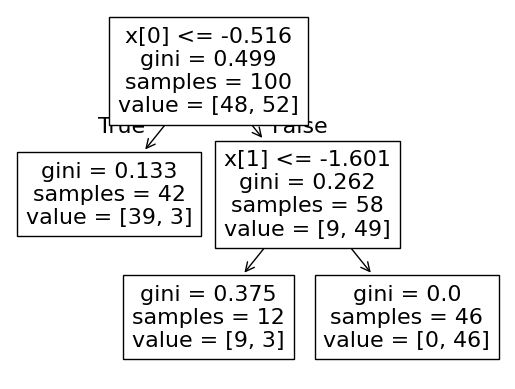

In [59]:
from sklearn import tree
tree.plot_tree(clf)

## Entropy for Decision Trees

In decision trees, *entropy* is used to measure the impurity or uncertainty in a dataset. It is defined as:

$
H(D) = -\sum_{i=1}^{n} p_i \log_2(p_i)
$

### Where:
- $ H(D) $ is the entropy of the dataset $ D $.
- $ p_i $ is the proportion of instances belonging to class $ i $.
- $ n $ is the total number of classes in the dataset.

### Example

For a dataset $ D $ with two classes $ C_1 $ and $ C_2 $, if:

$
p_1 = 0.5 \quad \text{and} \quad p_2 = 0.5
$

The entropy is calculated as:
$
H(D) = -\left(0.5 \log_2(0.5) + 0.5 \log_2(0.5)\right) = 1
$

- **Case 1 (Pure Dataset):** If $ p_1 = 1 $ and $ p_2 = 0 $, then:
  $
  H(D) = 0
  $
  This means the dataset is completely pure.

- **Case 2 (Maximum Uncertainty):** If $ p_1 = 0.5 $ and $ p_2 = 0.5 $, then:
  $
  H(D) = 1
  $
  This indicates maximum uncertainty.


### Entropy in Splitting for Decision Trees

When splitting a dataset $ D $ into subsets $ D_1, D_2, \dots, D_k $ based on a feature, the **weighted average entropy** after the split is computed as:

$
H_{\text{split}} = \sum_{j=1}^{k} \frac{|D_j|}{|D|} H(D_j)
$

### Information Gain

The reduction in entropy after a split, known as the **information gain (IG)**, is calculated as:

$
\text{IG} = H(D) - H_{\text{split}}
$

**Where:**
- $ H(D) $: Entropy of the dataset before the split.
- $ H_{\text{split}} $: Weighted average entropy of the subsets after the split.

A feature with a higher information gain provides a better split for the dataset.



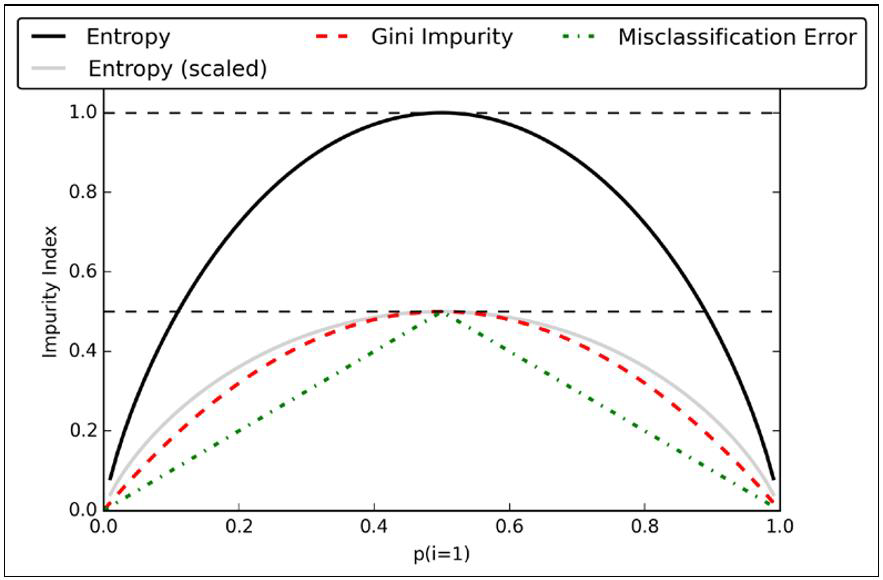

### Example:

['Ray', 'Ray', 'Stephen', Stephen']

Ray - 2, Stephen - 2

Proportions:

Ray: $\frac{2}{4}$, Stephen: $\frac{2}{4}$

Value for Ray:
$$-\frac{2}{4} * log_2(\frac{2}{4})$$
$$-0.5 * -1$$
$$0.5$$

Stephen has the same value $0.5$.

The entropy of the set is $$entropy=0.5+0.5 = 1.0$$

### Example 2:

['Pears', 'Pears', 'Pears']

Pears - 3

Ratios:

Pears $\frac{3}{3} = 1$

$$-1 * log_2(1)$$
$$-1 * 0$$
$$entropy=0$$

## Gini

$Gini(X_) = \sum_i p_{i} (1 - p_{i})$,

where $p_{i}$ is the probability that an element is of class *i*.

### Example:

['Ray', 'Ray', 'Stephan', Stephan']

Ray - 2, Stephan - 2

Proportions:

Ray: $\frac{2}{4}$, Stephan: $\frac{2}{4}$

Value for Ray:
$$\frac{2}{4} * (1 - \frac{2}{4})$$
$$0.5 * 0.5$$
$$0.25$$

Stephan has the same value $0.25$.

$$gini=0.25+0.25 = 0.5$$

### Example 2:

['Pears', 'Pears', 'Pears']

Pears - 3

Proportions:

Pears $\frac{3}{3} = 1$

$$1 * (1 - 1)$$
$$1 * 0$$
$$gini=0$$

In [60]:
def gini_impurity(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    impurity = sum([subset_count * (1 - subset_count) 
                    for subset_count in subset_counts_normalized])
    
    print('Gini impurity for', subset_counts, " is:", impurity)
    return impurity

In [61]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0]  is: 0.0
Gini impurity for [1 0]  is: 0.0
Gini impurity for [9 1]  is: 0.18
Gini impurity for [4 4]  is: 0.5


In [62]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0 1]  is: 0.4444444444444445
Gini impurity for [6 0 0]  is: 0.0
Gini impurity for [9 1 0]  is: 0.18
Gini impurity for [5 5 0]  is: 0.5
Gini impurity for [5 5 5]  is: 0.6666666666666667


[Text(0.4, 0.8333333333333334, 'x[0] <= -0.516\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(0.2, 0.5, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -1.601\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]')]

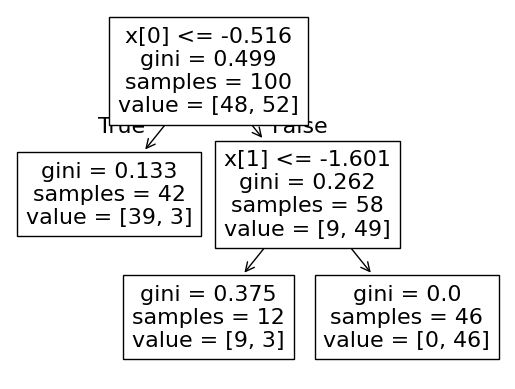

In [63]:
tree.plot_tree(clf)

In [64]:
gini_impurity([48,52])
gini_impurity([9, 49])
gini_impurity([39, 3])
gini_impurity([0, 46]);

Gini impurity for [48 52]  is: 0.4992
Gini impurity for [ 9 49]  is: 0.2621878715814506
Gini impurity for [39  3]  is: 0.13265306122448978
Gini impurity for [ 0 46]  is: 0.0


### Pros:
* The tree is easy to interpret.
* Easily handles irrelevant attributes (*gain =0*).
* Can handle missing data. (Not for the current implementation in sklearn).
* Compact representation of the model.
* Fast at prediction: *O(depth of the tree)*.
* Can do multi-class classification without additional tricks.
* Easy to use and gives good results with little experimentation.

### Cons:
* Splits attributes only along axes.
* Greedy - may not find the best tree.
* Exponential growth of possible trees.
* Overfits heavily.

## Random Forest

- Example of ensemble learning
- Trains a set of trees (forest) on random subsets of the data and averages the results

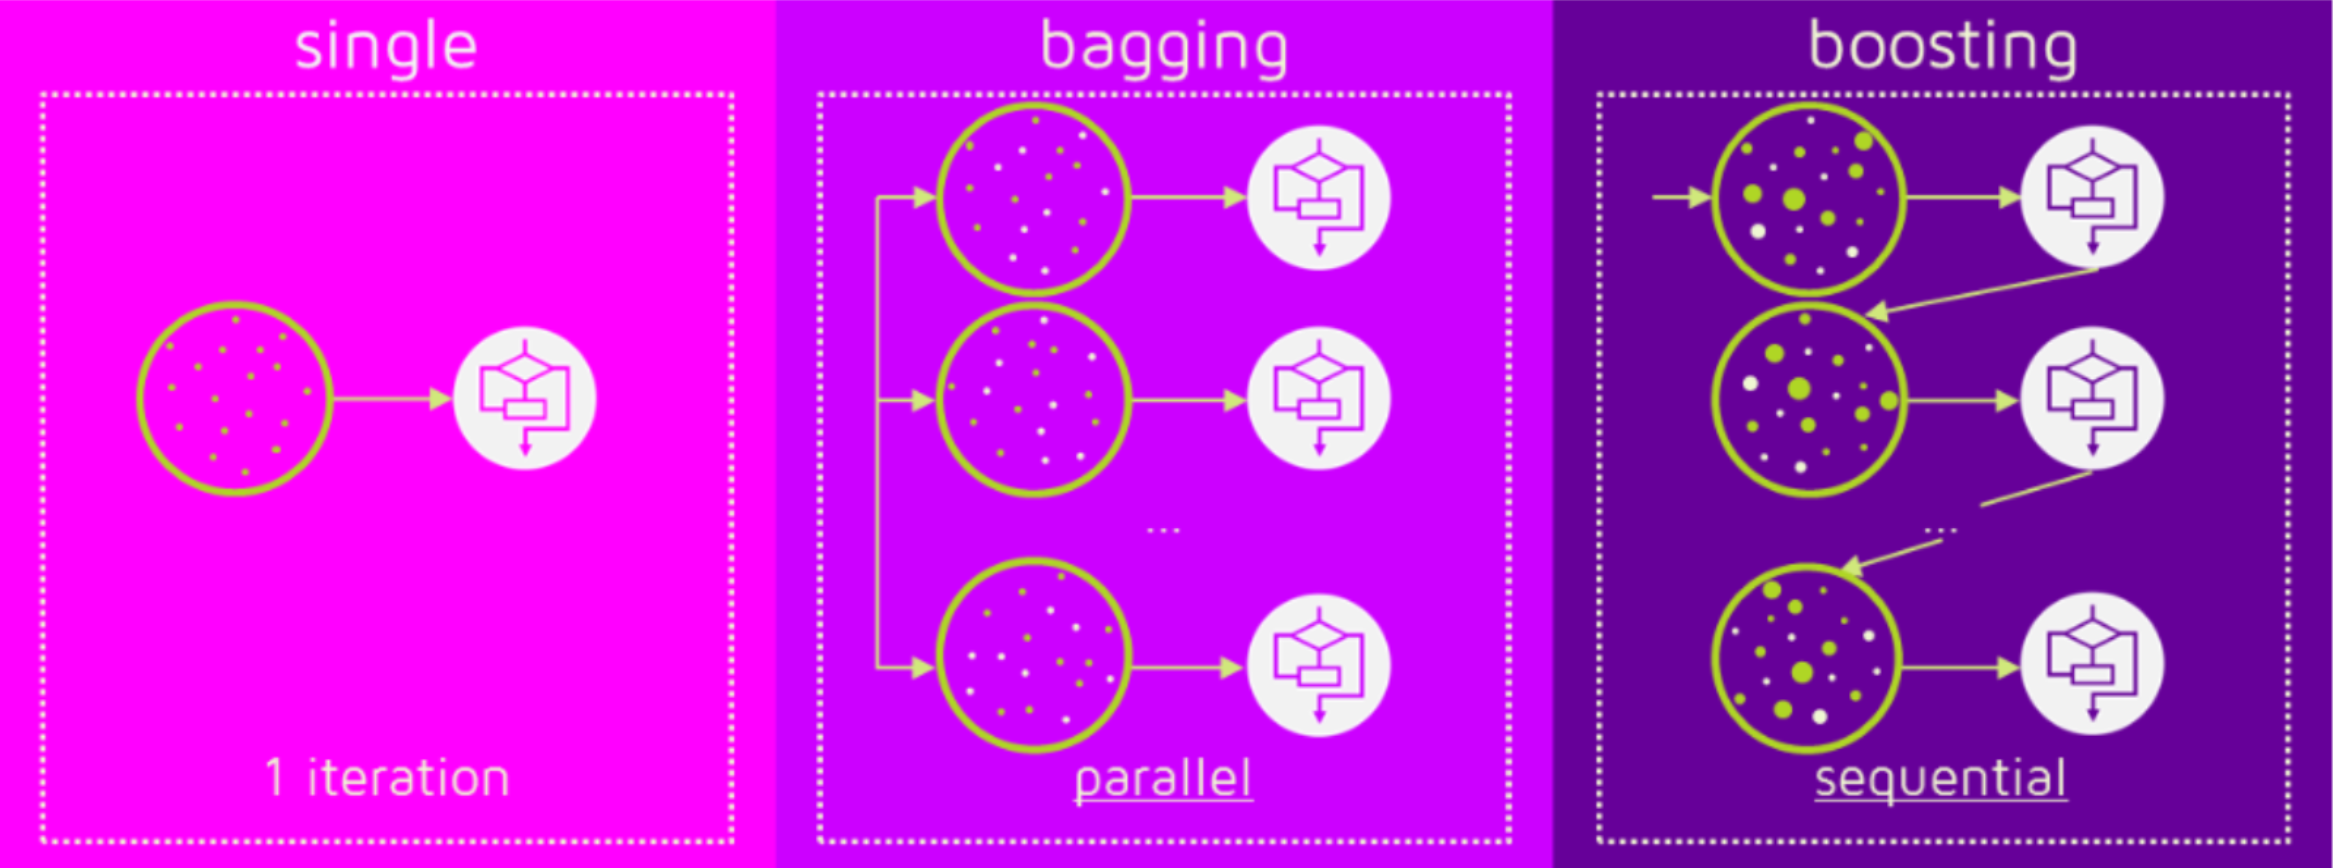

In [65]:
from sklearn.ensemble import RandomForestClassifier

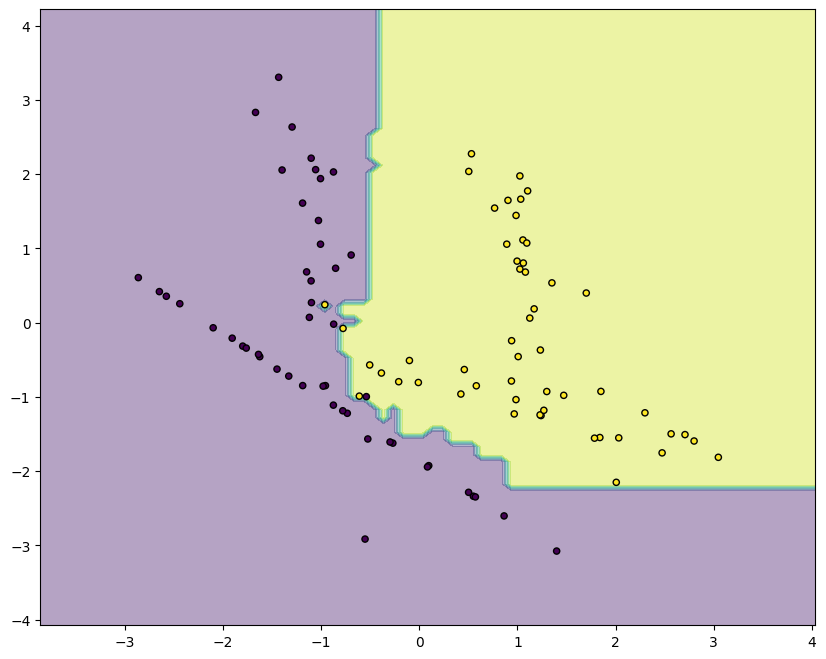

In [66]:
clf = RandomForestClassifier(random_state=23).fit(x,y) # без настройка на параметрите
plot_boundary(clf, x, y)

## RF Parameters:

* `n_estimators`: number of trees - 10, 100, 1000
* `criterion`: for all trees - gini, entropy
* `max_features`: How many features to try when searching for the best split. Default - `sqrt(n_features)` - different for each new search.
* `max_depth`: Maximum depth of the trees
* `min_samples_split`: Minimum number of samples to split the node
* `bootstrap` - Second parameter for randomness - random sampling with replacement. Takes the same number of samples as the original set.
* `n_jobs` - Trains several trees at once, but uses more memory.
* `random_state` - reproducible experiments

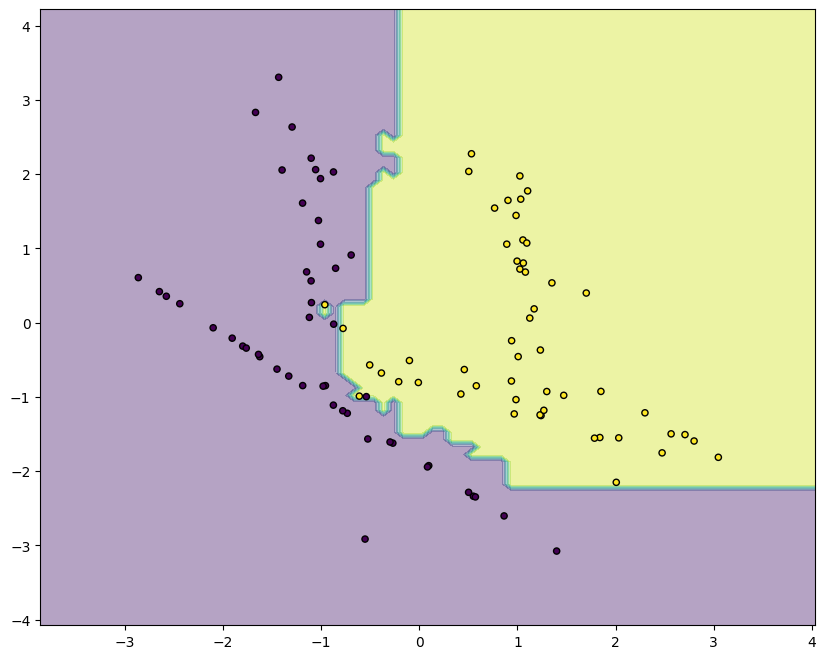

In [22]:
clf = RandomForestClassifier(random_state=100).fit(x,y)
plot_boundary(clf, x, y)

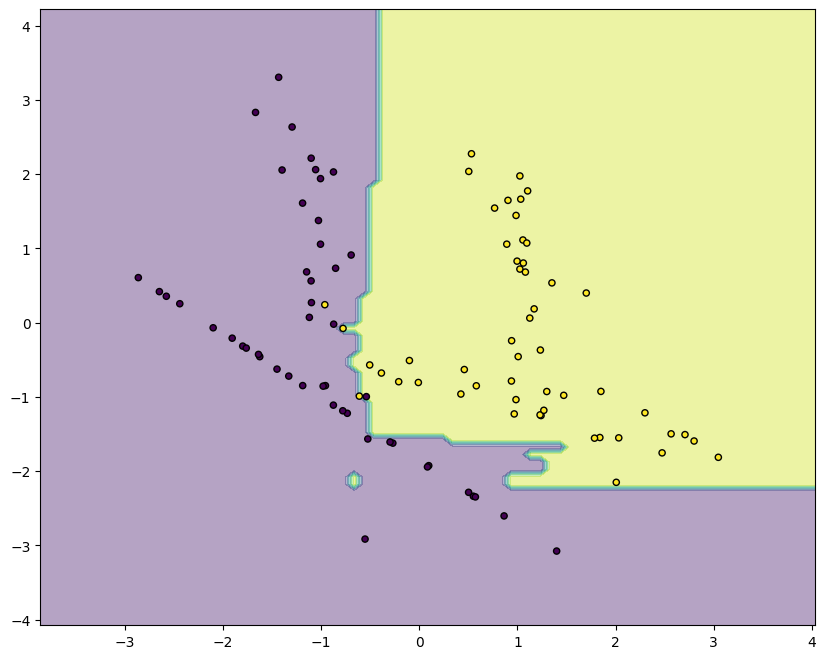

In [67]:
# Тъй като е случайно, можем да получим и различна граница 
clf = RandomForestClassifier(n_estimators=10).fit(x,y)
plot_boundary(clf, x, y)

### Feature importance in RF - Similar to parameter weights in linear models.
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_forest_importances_001.png)

http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## AdaBoost

# AdaBoost (Adaptive Boosting)

**AdaBoost** is a type of ensemble learning algorithm, specifically a *boosting* algorithm, used to improve the accuracy of weak learners (typically decision stumps) by combining them iteratively to create a strong classifier. It assigns weights to incorrectly classified samples, making the weak classifier focus more on challenging examples in subsequent iterations.


1. **Weak Learners:**
   - Weak learners are simple models that perform slightly better than random guessing (e.g., a decision stump).
   - AdaBoost combines these weak learners into a strong classifier by sequentially adjusting the weights of samples in the dataset.

2. **Reweighting the Dataset:**
   - Misclassified samples are assigned higher weights so that the next weak learner focuses on these "harder" examples.

3. **Weighted Voting:**
   - Each weak learner contributes to the final decision, weighted based on its accuracy.



## AdaBoost Algorithm

**Function**: `AdaBoost(examples, L, K)` returns a hypothesis.

### **Inputs**:
- `examples`: A set of $N$ labeled examples $(x_1, y_1), \dots, (x_N, y_N)$.
- $L$: A learning algorithm.
- $K$: The number of hypotheses in the ensemble.

### **Local Variables**:
- $\mathbf{w}$: A vector of $N$ example weights, initially all $1/N$.
- $\mathbf{h}$: A vector of $K$ hypotheses.
- $\mathbf{z}$: A vector of $K$ hypothesis weights.

### **Algorithm**:

1. $\epsilon \gets$ a small positive number, used to avoid division by zero.

2. **For** $k = 1$ to $K$ **do**:
   - $\mathbf{h}[k] \gets L(\text{examples}, \mathbf{w})$
   - $\text{error} \gets 0$

   - **For** $j = 1$ to $N$ **do**:  
     // Compute the total error for $\mathbf{h}[k]$
     - **If** $\mathbf{h}[k](x_j) \neq y_j$ **then**:
       $
       \text{error} \gets \text{error} + \mathbf{w}[j]
       $

   - **If** $\text{error} > \frac{1}{2}$ **then** break from loop.

   - $\text{error} \gets \min(\text{error}, 1 - \epsilon)$

   - **For** $j = 1$ to $N$ **do**:  
     // Give more weight to the examples $\mathbf{h}[k]$ got wrong
     - **If** $\mathbf{h}[k](x_j) = y_j$ **then**:
       $
       \mathbf{w}[j] \gets \mathbf{w}[j] \cdot \frac{\text{error}}{1 - \text{error}}
       $

   - $\mathbf{w} \gets \text{NORMALIZE}(\mathbf{w})$

   - $\mathbf{z}[k] \gets \frac{1}{2} \log\left(\frac{1 - \text{error}}{\text{error}}\right)$  
     // Give more weight to accurate $\mathbf{h}[k]$

3. **Return**:
   $
   \text{Function}(x) = \sum_{k=1}^{K} \mathbf{z}_k \cdot \mathbf{h}_k(x)
   $

### **Explanation of the Algorithm**:
1. **Initialization**:
   - All examples are assigned equal weights initially ($\mathbf{w}[j] = 1/N$).

2. **Training Weak Learners**:
   - For each iteration $k$, a weak learner $\mathbf{h}[k]$ is trained on the weighted dataset.

3. **Error Calculation**:
   - The weighted error of the weak learner is calculated as the sum of weights of misclassified examples.

4. **Weight Update**:
   - Weights of misclassified examples are increased, making the weak learner focus on harder examples in the next iteration.

5. **Hypothesis Weight**:
   - The weight of each weak learner ($\mathbf{z}[k]$) is determined based on its accuracy.

6. **Final Hypothesis**:
   - The final strong classifier is a weighted combination of all weak learners.


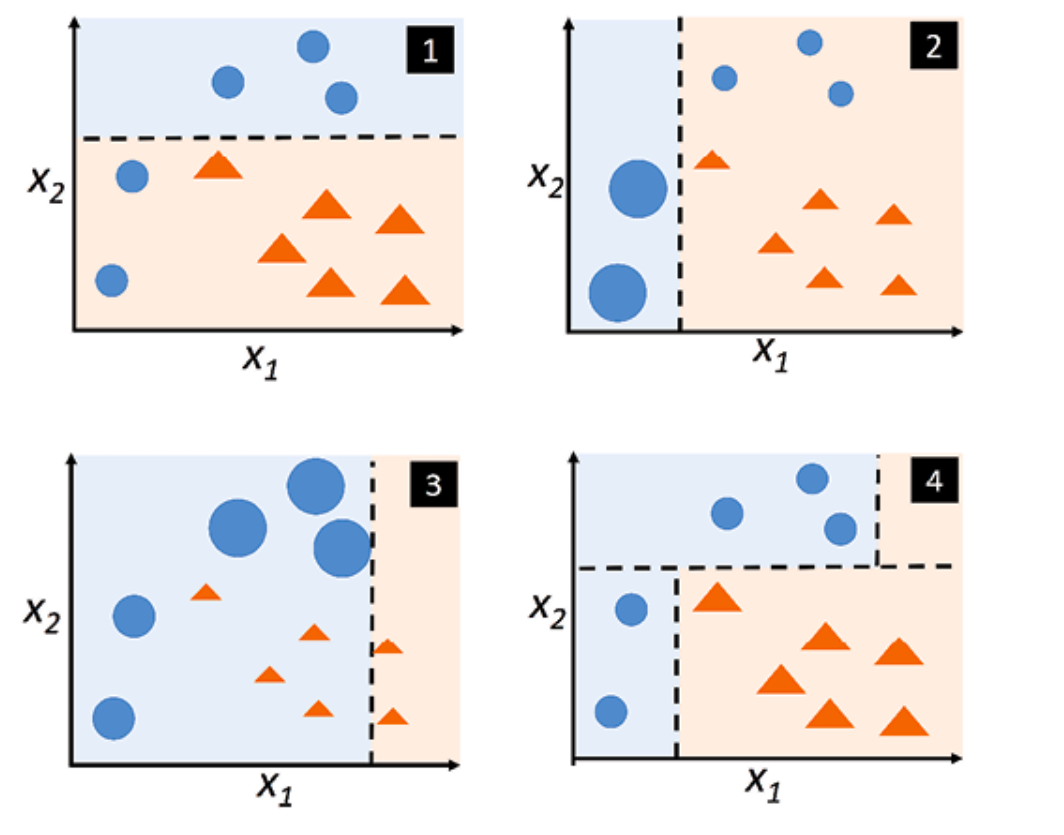

## XGBoost

```plaintext
1. We train a weak model on the data

2. We repeat until we reach a termination criterion:

        We train a new weak model on the error of the previous ones

3. Result all weak models
```

```plaintext
Function GradientBoosting(data, num_trees):
    model = initialize_model()
    for t in range(num_trees):
        residuals = calculate_residuals(model.predict(data), data.targets)
        tree = build_tree(data.features, residuals)
        model.add_tree(tree, learning_rate)
    return model
```


[xgboost pseudocode](https://xgboosting.com/xgboost-algorithm-pseudocode/)

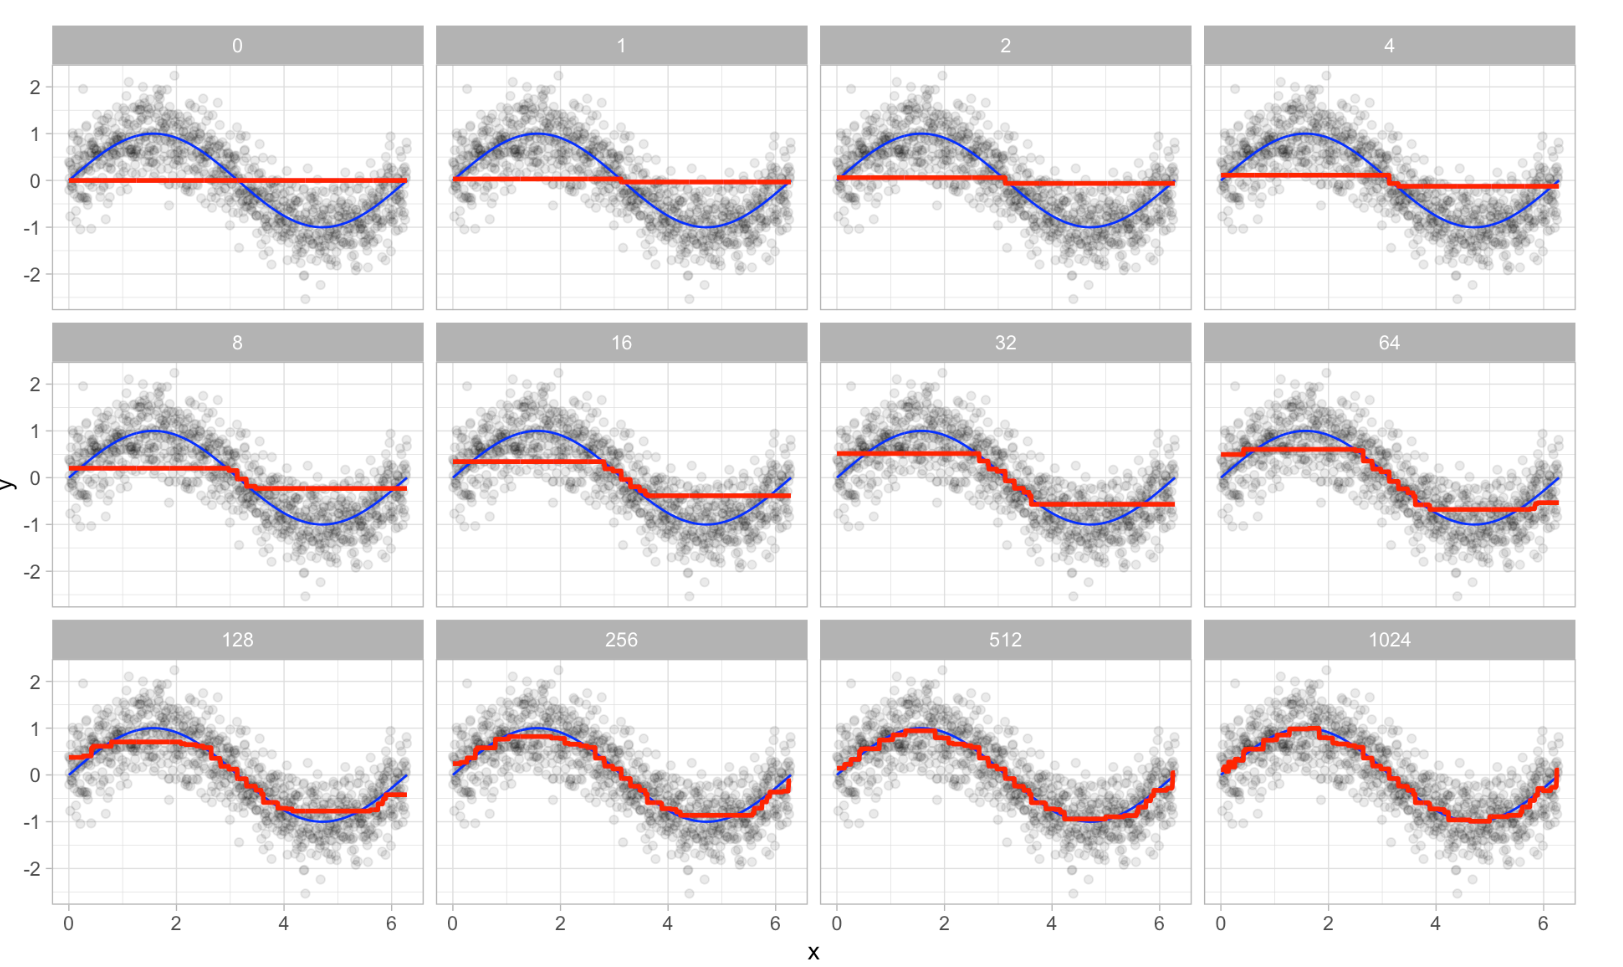


# XGBoost (Extreme Gradient Boosting)

**XGBoost** is a powerful and efficient implementation of the gradient boosting algorithm. It is widely used in machine learning competitions and real-world applications due to its speed, scalability, and performance. XGBoost builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous ones by minimizing a loss function.


## **Key Concepts of XGBoost**

1. **Gradient Boosting:**
   - XGBoost is based on gradient boosting, where models are trained sequentially, and each new model focuses on reducing the residual errors of the previous models.

2. **Objective Function:**
   - The objective function combines a **loss function** (to measure the model's error) and a **regularization term** (to control model complexity and prevent overfitting):
     $
     \text{Objective} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
     $
     - $ L(y_i, \hat{y}_i) $: Loss function (e.g., mean squared error for regression).
     - $ \Omega(f_k) $: Regularization term for tree complexity.

3. **Additive Model:**
   - XGBoost adds one tree at a time to minimize the objective function:
     $
     \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + f_t(x_i)
     $
     - $ f_t(x_i) $: The new tree added at iteration $ t $.

4. **Second-Order Approximation:**
   - XGBoost uses a second-order Taylor expansion to approximate the loss function, making optimization more efficient:
     $
     L(y_i, \hat{y}_i) \approx \text{constant} + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2
     $
     - $ g_i = \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} $: First-order gradient.
     - $ h_i = \frac{\partial^2 L(y_i, \hat{y}_i)}{\partial \hat{y}_i^2} $: Second-order gradient (Hessian).

5. **Regularization:**
   - XGBoost includes regularization to control overfitting by penalizing tree complexity:
     $
     \Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
     $
     - $ T $: Number of leaves in the tree.
     - $ w_j $: Weight of leaf $ j $.
     - $ \gamma, \lambda $: Regularization parameters.


## **Pseudocode for XGBoost**

```plaintext
Algorithm: XGBoost
Input: Training data {(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)}, number of trees T, learning rate η
Output: Final prediction model F(x)

1. Initialize predictions:
   F_0(x) = argmin_θ ∑ L(y_i, θ) for i = 1 to n

2. For t = 1 to T:
   a. Compute gradients and Hessians:
      g_i = ∂L(y_i, F_{t-1}(x_i)) / ∂F_{t-1}(x_i)
      h_i = ∂²L(y_i, F_{t-1}(x_i)) / ∂F_{t-1}(x_i)²

   b. Fit a regression tree f_t(x) to minimize the objective:
      ∑ [g_i f_t(x_i) + 0.5 h_i f_t(x_i)²] + Ω(f_t)

   c. Update the model:
      F_t(x) = F_{t-1}(x) + η f_t(x)

3. Return the final model:
   F(x) = F_T(x)
```


## **Steps in XGBoost**

1. **Initialization:**
   - Start with an initial prediction $ F_0(x) $, often the mean of the target variable for regression or the log-odds for classification.

2. **Gradient and Hessian Calculation:**
   - Compute the first-order gradient ($ g_i $) and second-order gradient ($ h_i $) for each training sample.

3. **Tree Construction:**
   - Fit a regression tree $ f_t(x) $ to the gradients and Hessians to minimize the objective function.

4. **Model Update:**
   - Add the new tree $ f_t(x) $ to the ensemble with a learning rate $ \eta $ to control the contribution of each tree.

5. **Repeat:**
   - Repeat the process for $ T $ iterations (number of trees).

6. **Final Prediction:**
   - Combine all trees to make the final prediction.

